# $$\text{Titanic Survival Prediction}$$

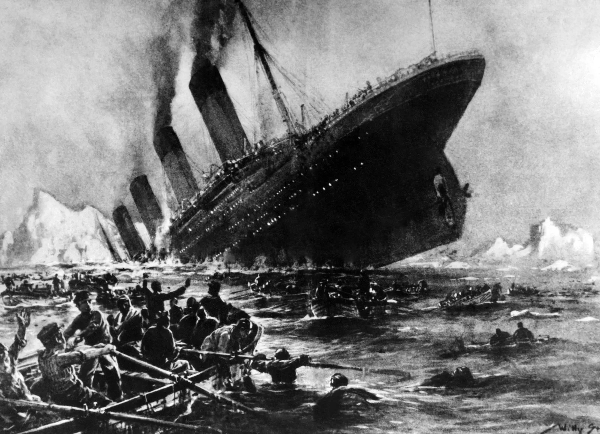

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_passid = test['PassengerId']

In [3]:
display('Train data view:', train, 'Test data view:', test)

'Train data view:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


'Test data view:'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.drop('Name', axis=1).describe(include='object')

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,347082,B96 B98,S
freq,577,7,4,644


In [8]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

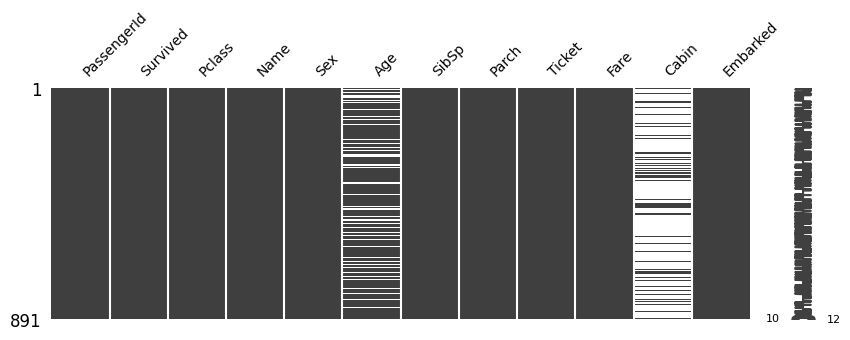

In [9]:
import missingno
missingno.matrix(train, figsize=(10,3), fontsize=10)
plt.show()

In [10]:
for i in train.columns:
    if train[i].isnull().sum()>0:
        print('The percentage of null values in {} is {:.03f}'.format(i, \
                                                    (train[i].isnull().sum()/(len(train[i])))*100))

The percentage of null values in Age is 19.865
The percentage of null values in Cabin is 77.104
The percentage of null values in Embarked is 0.224


In [11]:
cat_vars = [column for column in train.columns if train[column].dtypes=='object']
num_vars = [column for column in train.columns if train[column].dtypes !='object']
print('Categorical Variables are:', cat_vars)
print('Numerical Variables are:', num_vars)

Categorical Variables are: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Variables are: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


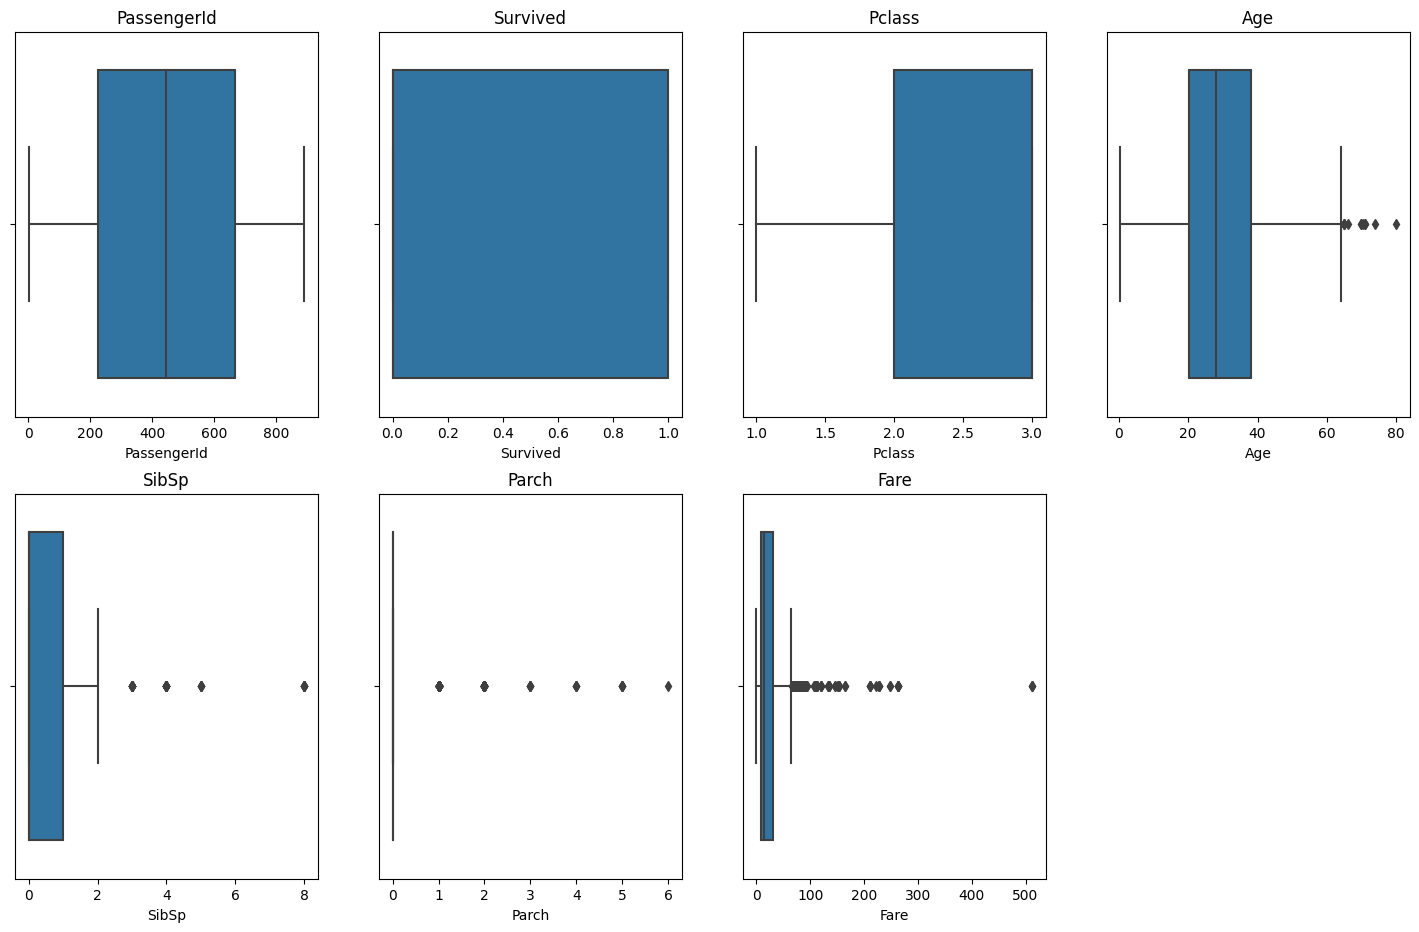

In [12]:
j=1
plt.subplots(figsize=(18,11))
for i in num_vars:
    plt.subplot(2, 4, j)
    sns.boxplot(x=train[i])
    plt.title(i)
    j+=1
    
plt.show()

<AxesSubplot: >

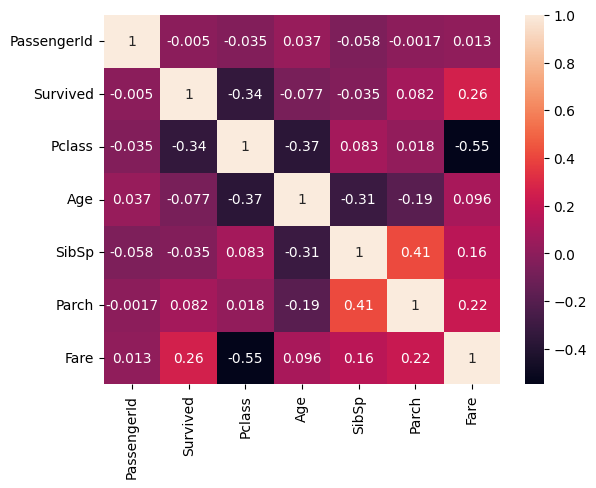

In [13]:
sns.heatmap(train.corr(), annot=True)

- **Pclass** is having the **high correlation** with the survival followed by the Fare

#### Survival Count 

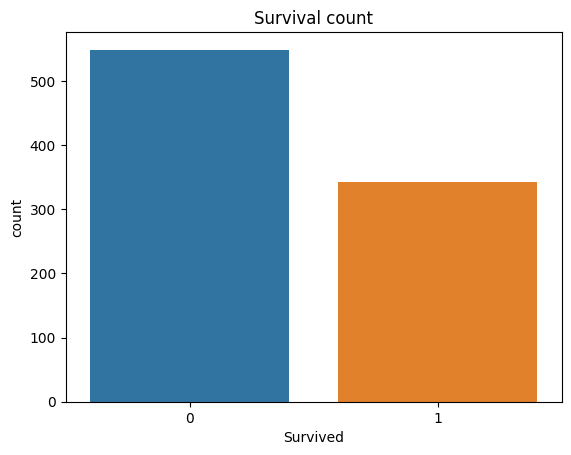

In [14]:
#total survival count
sns.countplot(data = train, x = 'Survived')
plt.title('Survival count')
plt.show()

- Unfortunately the death count is more than the survived

#### Survival based on class 

In [15]:
survival = pd.crosstab(train['Pclass'], train['Survived'], margins=True)
survival_percent = (survival[1]/survival['All'])*100
survival['Percentage'] = survival_percent

survival.style.background_gradient()

Survived,0,1,All,Percentage
Pclass,,,,
1,80,136,216,62.962963
2,97,87,184,47.282609
3,372,119,491,24.236253
All,549,342,891,38.383838


- From the above we can clearly observe that the survival rate is highest in the 1st Class and least in the 3rd class, which indicates that, people in the 1st class has more chance to survive followed by 2nd Class and the 3rd Class
- The overall survival percentage in the train data is 38.38%

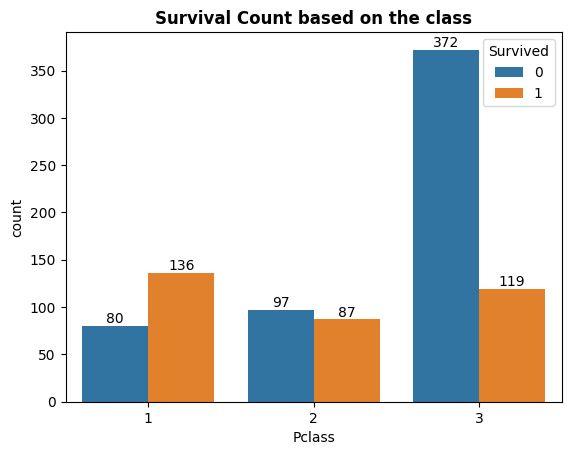

In [16]:
ax = sns.countplot(data=train, x='Pclass', hue='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Count based on the class', fontdict={'fontweight':'bold'})
plt.show()

- **The reason why 1st Class people survived the most might be due to the placement of the 1st class cabin on the ship, the 1st class is on the top, followed by the 2nd class and the 3rd class underneath**

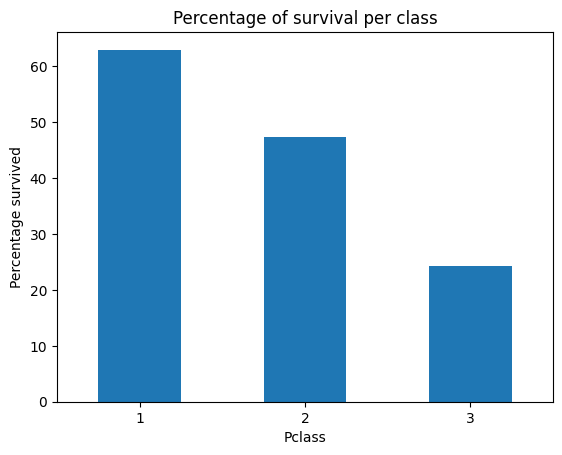

In [17]:
survival.iloc[:3,3].plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Percentage of survival per class')
plt.ylabel('Percentage survived')
plt.show()

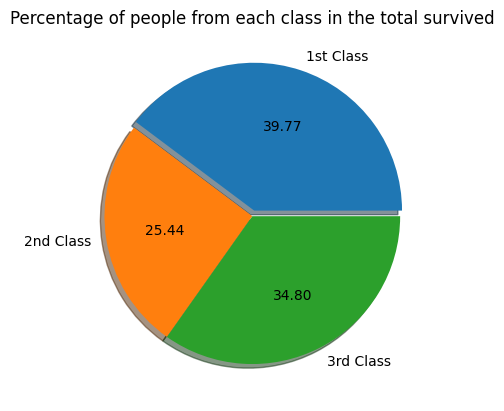

In [18]:
plt.pie(survival.T.iloc[1, :3], autopct='%.2f', explode=[0.04,0,0], 
        labels=['1st Class', '2nd Class', '3rd Class'], shadow=True)
plt.title('Percentage of people from each class in the total survived')
plt.show()

- Out of the total 342 survived, people survived in the first class accounts for 39,77% and 25.44% from second class and 34.80% from 3rd class
- **Just because the strength in the 3rd class is huge compared to the other class, the precentage value is a bit higher than the 2nd class but the survival chances are still high for the 1st and 2nd class compared to the 3rd as we can see from the above bar plot**

#### Survival based on gender 

In [19]:
gender_survival = pd.crosstab(train['Sex'], train['Survived'])
gender_survival['Survival percentage'] = (gender_survival[1]/(gender_survival[0]+gender_survival[1]))*100
gender_survival.style.background_gradient(cmap='Greens', subset='Survival percentage')

Survived,0,1,Survival percentage
Sex,,,
female,81,233,74.203822
male,468,109,18.890815


- from the above data it is evident that the survival percentage is very high in female than male

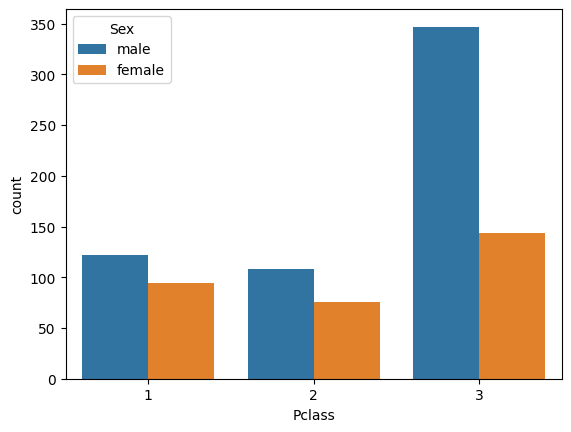

In [20]:
sns.countplot(data=train, x='Pclass', hue='Sex')
#sns.countplot(data=train, x='Pclass', hue='Survived', color='white')
plt.show()

In [21]:
count_split = pd.DataFrame(train.groupby(['Pclass', 'Sex', 'Survived']).size()).rename(columns={0:'Count'})
count_split

Count
Pclass Sex    Survived       
1      female 0             3
              1            91
       male   0            77
              1            45
2      female 0             6
              1            70
       male   0            91
              1            17
3      female 0            72
              1            72
       male   0           300
              1            47

In [22]:
count_split = count_split.unstack().reset_index()
count_split['Survival Percentage'] = \
                    (count_split['Count'][1]/(count_split['Count'][0]+count_split['Count'][1]))*100
count_split.style.background_gradient(subset=['Count', 'Survival Percentage'])

- Along with the overall survival percentage, the survival percentage in each class individually is also higher for female

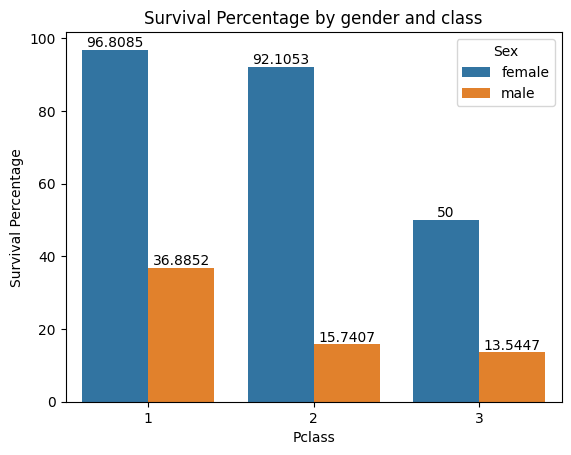

In [23]:
ax = sns.barplot(data=count_split, y='Survival Percentage',x='Pclass', hue='Sex')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Percentage by gender and class')
plt.show()

#### Survival based on the embarked location 

In [24]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [25]:
embark_survived = pd.crosstab(train['Embarked'], train['Survived'])
embark_survived['Survival Percentage'] = (embark_survived[0]/(embark_survived[0]+embark_survived[1]))*100
embark_survived

Survived,0,1,Survival Percentage
Embarked,,,
C,75,93,44.642857
Q,47,30,61.038961
S,427,219,66.099071


#### Calculating the family-size on board and checking if there is any relation with the survival

In [26]:
train['Size_of_family'] = train['SibSp'] + train['Parch'] +1
test['Size_of_family'] = test['SibSp'] + test['Parch'] +1

familysize_survive = train.groupby(['Size_of_family', 'Survived']).size().reset_index()
familysize_survive=familysize_survive[familysize_survive['Survived']==1]
familysize_survive.rename(columns={0:'Survived'})
Total = pd.DataFrame(train['Size_of_family'].value_counts()).reset_index().rename(
    columns={'index':'Size_of_family', 'Size_of_family':'Count'})
familysize_survive = pd.merge(familysize_survive, Total, how='right')
familysize_survive.drop('Survived', axis=1, inplace=True)
familysize_survive.rename(columns={0:'Survival Count'}, inplace=True)
familysize_survive.set_index('Size_of_family', inplace=True)
familysize_survive.fillna(0, inplace=True)
familysize_survive.reset_index(inplace=True)
familysize_survive.style.background_gradient(subset=['Survival Count','Count'])

,Size_of_family,Survival Count,Count
0,1,163.000000,537
1,2,89.000000,161
2,3,59.000000,102
3,4,21.000000,29
4,6,3.000000,22
5,5,3.000000,15
6,7,4.000000,12
7,11,0.000000,7
8,8,0.000000,6


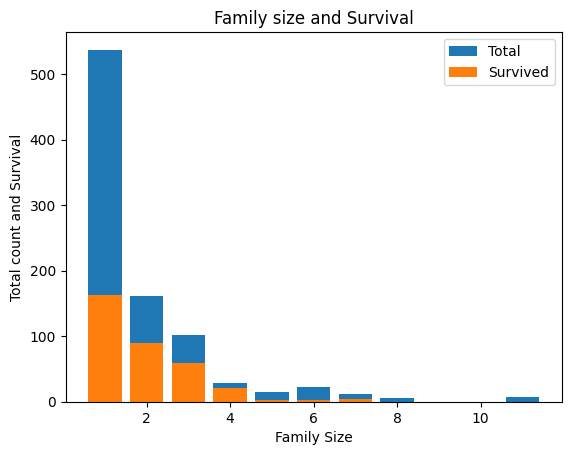

In [27]:
plt.bar(familysize_survive['Size_of_family'], familysize_survive['Count'], label='Total')
plt.bar(familysize_survive['Size_of_family'], familysize_survive['Survival Count'], label='Survived')
plt.title('Family size and Survival')
plt.xlabel('Family Size')
plt.ylabel('Total count and Survival')
plt.legend()
plt.show()

#### Ticket importance

In [28]:
len(train['Ticket'].unique())

681

- The dataset is of 891 people but there are only 681 unique tickets, so some of the fare values represented is not per head but for all the people included in the ticket and when we breakdown the ticket we get to know the fare per head

In [29]:
train['Ticket'].dtype

dtype('O')

In [30]:
Ticket_numerical = []

for i in list(train['Ticket']):
    if i.isnumeric():
        Ticket_numerical.append(1)
    else:
        Ticket_numerical.append(0)
    

train['Ticket_numerical'] = Ticket_numerical

In [31]:
tic_survived = pd.DataFrame(train.groupby(['Ticket_numerical', 'Survived']).size())
tic_survived.reset_index(inplace=True)
tic_survived.rename(columns={0:'count'}, inplace=True)
tic_survived

,Ticket_numerical,Survived,count
0,0,0,142
1,0,1,88
2,1,0,407
3,1,1,254


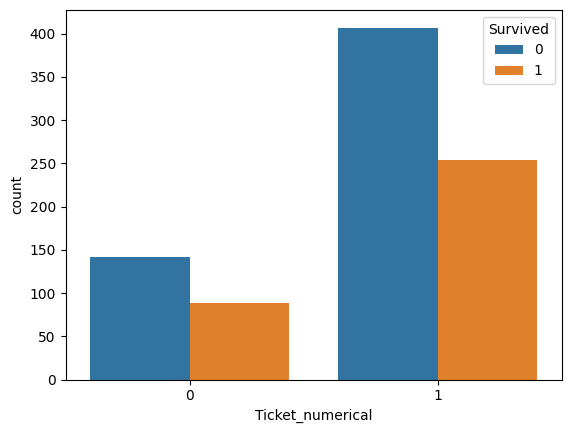

In [32]:
sns.barplot(data=tic_survived, y='count',x='Ticket_numerical', hue='Survived')
plt.show()

- From the above data we can conclude that based on whether the ticket contains only numeric or aplha numeric the survival doest vary, almost the same importance

In [33]:
train.drop('Ticket_numerical', axis=1, inplace=True)

#### Fare 

In [34]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [35]:
train.shape

(891, 13)

In [36]:
t = pd.DataFrame(train.groupby(['Ticket'])['Size_of_family'].sum())
t.reset_index(inplace=True)
t

,Ticket,Size_of_family
0,110152,3
1,110413,9
2,110465,2
3,110564,1
4,110813,2
...,...,...
676,W./C. 6608,20
677,W./C. 6609,1
678,W.E.P. 5734,2
679,W/C 14208,1


In [37]:
tic = pd.DataFrame(train.groupby(['Ticket'])['Fare'].sum())
tic.reset_index(inplace=True)
tic['family_size'] = t['Size_of_family']
tic['fare_per_person'] = tic['Fare']/tic['family_size']
tic

,Ticket,Fare,family_size,fare_per_person
0,110152,259.500,3,86.500000
1,110413,238.950,9,26.550000
2,110465,104.000,2,52.000000
3,110564,26.550,1,26.550000
4,110813,75.250,2,37.625000
...,...,...,...,...
676,W./C. 6608,137.500,20,6.875000
677,W./C. 6609,7.550,1,7.550000
678,W.E.P. 5734,61.175,2,30.587500
679,W/C 14208,10.500,1,10.500000


#### Working on titles to check its importance 

In [38]:
#extract titles
for nm in train['Name']:
    train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#[name.split(',')[1].split('.')[0].strip() for name in train['Name']]    

    
for nm in test['Name']:
    test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 

In [39]:
print('Train data titles:',train['Title'].unique())
print('Train data titles:',test['Title'].unique())

Train data titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
Train data titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [40]:
for t in train['Title']:
    train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Imp')

    train['Title'] = train['Title'].replace('Mlle', 'Miss')
    train['Title'] = train['Title'].replace('Ms', 'Miss')
    train['Title'] = train['Title'].replace('Mme', 'Mrs')
    
for t in test['Title']:
    test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Imp')

    test['Title'] = test['Title'].replace('Mlle', 'Miss')
    test['Title'] = test['Title'].replace('Ms', 'Miss')
    test['Title'] = test['Title'].replace('Mme', 'Mrs') 
    
#mapping

train['Title'] = train['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Imp": 5})
test['Title'] = test['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Imp": 5})

In [41]:
title_survived = pd.DataFrame(train.groupby(['Title','Survived']).size())
title_survived.reset_index(inplace=True)
title_survived.rename(columns={0:'count'}, inplace=True)
title_survived

,Title,Survived,count
0,1,0,436
1,1,1,81
2,2,0,55
3,2,1,130
4,3,0,26
5,3,1,100
6,4,0,17
7,4,1,23
8,5,0,15
9,5,1,8


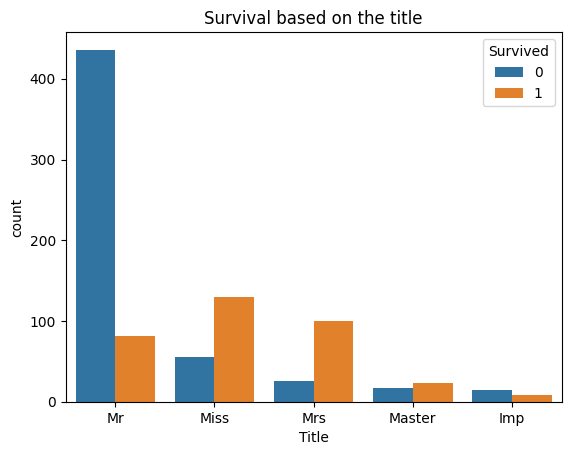

In [42]:
xpos = title_survived.Title.unique()
sns.barplot(data=title_survived, x='Title', y='count', hue='Survived')
l = ["Mr", "Miss", "Mrs", "Master", "Imp"]

plt.title('Survival based on the title')
plt.xticks(xpos-1, l)
plt.show()

#### Replacing null values in age column 

In [43]:
mean_age_title = pd.DataFrame(train.groupby('Title')['Age'].mean())
mean_age_title

,Age
Title,
1,32.368090
2,21.845638
3,35.788991
4,4.574167
5,45.545455


In [44]:
#fill null values of age in train data with the mean values based on the title
train['Age'] = train.groupby('Title')['Age'].transform(lambda age: np.where(np.isnan(age), round(age.mean()),age))

#fill the null values of age in the test data
test['Age'] = test.groupby('Title')['Age'].transform(lambda age: np.where(np.isnan(age), round(age.mean()),age))

In [45]:
train['Age'] = train['Age'].astype('int8')
test['Age'] = test['Age'].astype('int8')

In [46]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [47]:
print(train['Age'].min(), train['Age'].max())

0 80


In [48]:
for i in ['Age','Fare']:
    print('Skewness for {}'.format(i), train[i].skew())

Skewness for Age 0.3655191292110396
Skewness for Fare 4.787316519674893


In [49]:
bins = [0,1, 12, 18, 30, 50, 100]
labels = ['Infant','Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

age_cat = pd.cut(train['Age'], bins=bins, labels=labels)
train['Age_cat'] = age_cat

In [50]:
age_survival = pd.crosstab(train['Survived'], train['Age_cat']).T

age_survival['Percentage survival'] = (age_survival[1]/(age_survival[0]+age_survival[1]))*100

age_survival.style.background_gradient(subset=['Percentage survival'])

Survived,0,1,Percentage survival
Age_cat,,,
Infant,2,5,71.428571
Child,29,30,50.847458
Teenager,40,30,42.857143
Young Adult,190,118,38.311688
Adult,246,130,34.574468
Senior,42,22,34.375000


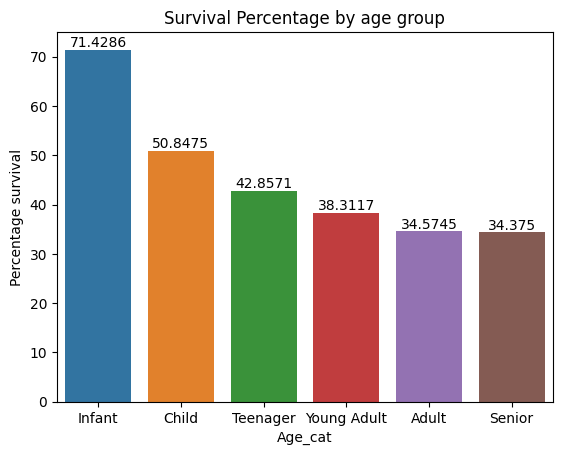

In [51]:
ax = sns.barplot(data=age_survival, y='Percentage survival',x=age_survival.index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Percentage by age group')
plt.show()

In [52]:
age_sex_survival = pd.DataFrame(train.groupby(['Age_cat', 'Sex', 'Survived']).size())
age_sex_survival.rename(columns={0:'Count'}).unstack().style.background_gradient()

#### Skew fare 

In [53]:
print('Train_fare Skew:', train['Fare'].skew())
print('Test_fare Skew:', test['Fare'].skew())

Train_fare Skew: 4.787316519674893
Test_fare Skew: 3.6922987243405156


In [54]:
train['Fare_log'] = np.log(train['Fare']+0.5)
test['Fare_log'] = np.log(test['Fare']+0.5)
print('Train Fare log skew:',train['Fare_log'].skew(),'\nTrain Fare log skew:',test['Fare_log'].skew())

Train Fare log skew: 0.056631553586926 
Train Fare log skew: 0.7230792006811307


In [55]:
train.drop('Fare', axis=1, inplace=True)
test.drop('Fare', axis=1, inplace=True)

In [56]:
#dropping the unwanted variables
test_passid = test['PassengerId']

var = ['PassengerId', 'Name', 'Ticket']
for i in var:
    train.drop(i, axis=1, inplace=True)
    test.drop(i, axis=1, inplace=True)
    
train.drop('Age_cat', axis=1, inplace=True)

## Working on Cabins 

In [57]:
train[train['Cabin'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Size_of_family,Title,Fare_log
0,0,3,male,22,1,0,NaN,S,2,1,2.047693
2,1,3,female,26,0,0,NaN,S,1,2,2.131203
4,0,3,male,35,0,0,NaN,S,1,1,2.145931
5,0,3,male,32,0,0,NaN,Q,1,1,2.192580
7,0,3,male,2,3,1,NaN,S,5,4,3.071535
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25,0,0,NaN,S,1,1,2.021548
885,0,3,female,39,0,5,NaN,Q,6,3,3.388619
886,0,2,male,27,0,0,NaN,S,1,5,2.602690
888,0,3,female,22,1,2,NaN,S,4,2,3.175968


In [58]:
cabins = list(train['Cabin'].unique())
print(cabins)

[nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B

In [59]:
train['Cabin'].fillna('NA', inplace=True)

In [60]:
cabins = list(train['Cabin'].unique())
print(cabins)

['NA', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 

In [61]:
for i in cabins:
    j = i.split(' ')
    if len(j)>1:
        print(i)

C23 C25 C27
F G73
D10 D12
B58 B60
F E69
C22 C26
B57 B59 B63 B66
B96 B98
B51 B53 B55
F G63
C62 C64
B82 B84


In [62]:
temp = []
for i in train['Cabin']:
    j = i.split(' ')
    j = j[0][0]
    temp.append(j)

#print(temp)

train['Cabin_code'] = temp

In [63]:
test['Cabin'].fillna('NA', inplace=True)

test_temp = []
for i in test['Cabin']:
    j = i.split(' ')
    j = j[0][0]
    test_temp.append(j)
    
#print(test_temp)
test['Cabin_code'] = test_temp

In [64]:
cabin_survived = pd.DataFrame(train.groupby(['Cabin_code', 'Survived']).size())
cabin_survived.rename(columns={0:'Count'}, inplace=True)
cabin_survived.reset_index(inplace=True)
cabin_survived

,Cabin_code,Survived,Count
0,A,0,8
1,A,1,7
2,B,0,12
3,B,1,35
4,C,0,24
5,C,1,35
6,D,0,8
7,D,1,25
8,E,0,8
9,E,1,24


<AxesSubplot: xlabel='Cabin_code', ylabel='Count'>

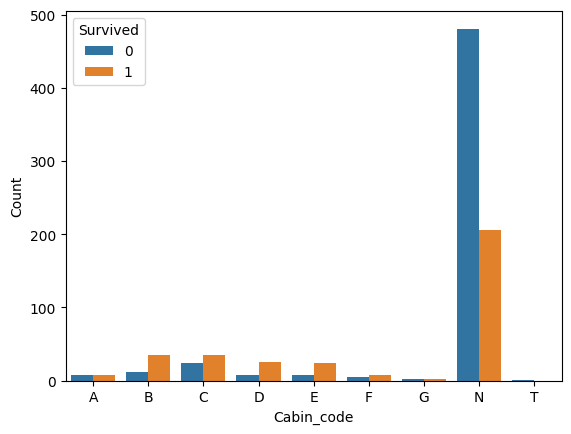

In [65]:
sns.barplot(data = cabin_survived, x='Cabin_code', y='Count', hue='Survived')

In [66]:
c_0 = cabin_survived[cabin_survived['Survived']==0]
c_0.drop('Survived', axis=1, inplace=True)
c_0.rename(columns = {'Count':'not_survived'}, inplace=True)
                      
c_1 = cabin_survived[cabin_survived['Survived']==1]
c_1.drop('Survived', axis=1, inplace=True)
c_1.rename(columns = {'Count':'survived'}, inplace=True)  

cabin_survived = pd.merge(c_0, c_1, on='Cabin_code', how='outer')
cabin_survived.fillna(0, inplace=True)
cabin_survived['survived'] = cabin_survived['survived'].astype('int16')

cabin_survived['Survival_percentage'] = \
        (cabin_survived['survived']/(cabin_survived['not_survived']+cabin_survived['survived']))*100
cabin_survived.drop(['not_survived', 'survived'], axis=1, inplace=True)
cabin_survived.style.background_gradient()

,Cabin_code,Survival_percentage
0,A,46.666667
1,B,74.468085
2,C,59.322034
3,D,75.757576
4,E,75.000000
5,F,61.538462
6,G,50.000000
7,N,29.985444
8,T,0.000000


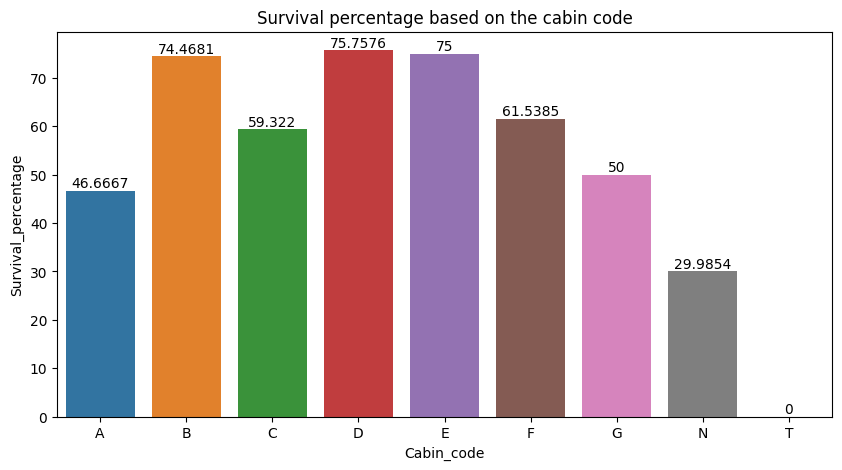

In [67]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=cabin_survived, x='Cabin_code', y='Survival_percentage')

for i in ax.containers:
    ax.bar_label(i)
    
plt.title('Survival percentage based on the cabin code')
plt.show()

- People in cabins **'D', 'E', 'B'** has higher chances of survival compared to the other cabins

- Also, there is only one person in the cabin starting with T in the training data lets see if there is anyone in th etest data

- **According to Britannica and fandom, Decks from A, B, C, D belong to the 1st class, D, E, F, G belong to 2nd class**

In [68]:
test[test['Cabin_code']=='T']

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Size_of_family,Title,Fare_log,Cabin_code


- As we can see there is no one with the T class in the test data we replace 'T' as 'N'

In [69]:
train['Cabin_code'] = train['Cabin_code'].str.replace('T', 'N')

In [70]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked', 'Size_of_family', 'Title', 'Fare_log', 'Cabin_code'],
      dtype='object')

In [71]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked',
       'Size_of_family', 'Title', 'Fare_log', 'Cabin_code'],
      dtype='object')

In [72]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [73]:
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [74]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [76]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [78]:
test

,Pclass,Age,Size_of_family,Title,Fare_log,Sex_male,Embarked_Q,Embarked_S,Cabin_code_B,Cabin_code_C,Cabin_code_D,Cabin_code_E,Cabin_code_F,Cabin_code_G,Cabin_code_N
0,3,34,1,1,2.119767,1,1,0,0,0,0,0,0,0,1
1,3,47,2,3,2.014903,0,0,1,0,0,0,0,0,0,1
2,2,62,1,1,2.321161,1,1,0,0,0,0,0,0,0,1
3,3,27,1,1,2.215119,1,0,1,0,0,0,0,0,0,1
4,3,22,3,3,2.548468,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,32,1,1,2.145931,1,0,1,0,0,0,0,0,0,1
414,1,39,1,5,4.695011,0,0,0,0,1,0,0,0,0,0
415,3,38,1,1,2.047693,1,0,1,0,0,0,0,0,0,1
416,3,32,1,1,2.145931,1,0,1,0,0,0,0,0,0,1


In [79]:
train

,Survived,Pclass,Age,Size_of_family,Title,Fare_log,Sex_male,Embarked_Q,Embarked_S,Cabin_code_B,Cabin_code_C,Cabin_code_D,Cabin_code_E,Cabin_code_F,Cabin_code_G,Cabin_code_N
0,0,3,22,2,1,2.047693,1,0,1,0,0,0,0,0,0,1
1,1,1,38,2,3,4.273652,0,0,0,0,1,0,0,0,0,0
2,1,3,26,1,2,2.131203,0,0,1,0,0,0,0,0,0,1
3,1,1,35,2,3,3.981549,0,0,1,0,1,0,0,0,0,0
4,0,3,35,1,1,2.145931,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,1,5,2.602690,1,0,1,0,0,0,0,0,0,1
887,1,1,19,1,2,3.417727,0,0,1,1,0,0,0,0,0,0
888,0,3,22,4,2,3.175968,0,0,1,0,0,0,0,0,0,1
889,1,1,26,1,1,3.417727,1,0,0,0,1,0,0,0,0,0


In [80]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = pd.DataFrame(ss.fit_transform(X_train), columns=[X_train.columns])
X_test = pd.DataFrame(ss.transform(X_test), columns=[X_test.columns])

test = pd.DataFrame(ss.transform(test), columns=[test.columns])

In [81]:
X = pd.DataFrame(ss.transform(X), columns=[X.columns])

In [82]:
X_train

,Pclass,Age,Size_of_family,Title,Fare_log,Sex_male,Embarked_Q,Embarked_S,Cabin_code_B,Cabin_code_C,Cabin_code_D,Cabin_code_E,Cabin_code_F,Cabin_code_G,Cabin_code_N
0,-1.614136,1.165634,-0.554666,-0.697546,0.441516,0.724310,-0.303355,0.592489,-0.237444,3.562627,-0.165581,-0.186772,-0.130931,-0.065049,-1.872519
1,-0.400551,-0.499679,-0.554666,-0.697546,-0.295925,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
2,0.813034,0.181585,-0.554666,-0.697546,-0.750659,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
3,0.813034,-0.272591,0.040096,-0.697546,-0.758799,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
4,0.813034,-1.786511,3.013909,0.282045,0.529653,-1.380624,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.813034,-0.651071,-0.554666,0.282045,-0.782666,-1.380624,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
708,-1.614136,0.181585,-0.554666,-0.697546,0.521270,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
709,0.813034,0.862850,0.634859,-0.697546,-0.219828,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
710,-1.614136,-1.180943,1.229621,0.282045,1.815264,-1.380624,-0.303355,0.592489,4.211513,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,-1.872519


In [83]:
X_test

,Pclass,Age,Size_of_family,Title,Fare_log,Sex_male,Embarked_Q,Embarked_S,Cabin_code_B,Cabin_code_C,Cabin_code_D,Cabin_code_E,Cabin_code_F,Cabin_code_G,Cabin_code_N
0,0.813034,-1.862207,0.634859,2.241228,-0.147508,0.724310,-0.303355,-1.687794,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
1,-0.400551,0.105889,-0.554666,-0.697546,-0.493443,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
2,0.813034,-0.726767,-0.554666,-0.697546,-0.750659,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
3,-0.400551,-1.786511,0.040096,0.282045,0.580640,-1.380624,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
4,0.813034,-1.180943,0.040096,0.282045,-0.430510,-1.380624,-0.303355,-1.687794,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.813034,-0.953855,-0.554666,-0.697546,-0.846886,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
175,0.813034,0.181585,-0.554666,-0.697546,-0.834319,0.724310,-0.303355,-1.687794,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
176,0.813034,0.635762,3.013909,1.261637,0.533062,-1.380624,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
177,-0.400551,-0.953855,-0.554666,0.282045,-0.493443,-1.380624,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040


In [84]:
test

,Pclass,Age,Size_of_family,Title,Fare_log,Sex_male,Embarked_Q,Embarked_S,Cabin_code_B,Cabin_code_C,Cabin_code_D,Cabin_code_E,Cabin_code_F,Cabin_code_G,Cabin_code_N
0,0.813034,0.332977,-0.554666,-0.697546,-0.761689,0.724310,3.296463,-1.687794,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
1,0.813034,1.317026,0.040096,1.261637,-0.862828,-1.380624,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
2,-0.400551,2.452466,-0.554666,-0.697546,-0.567450,0.724310,3.296463,-1.687794,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
3,0.813034,-0.196895,-0.554666,-0.697546,-0.669725,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
4,0.813034,-0.575375,0.634859,1.261637,-0.348220,-1.380624,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.813034,0.181585,-0.554666,-0.697546,-0.736455,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
414,-1.614136,0.711458,-0.554666,3.220820,1.722058,-1.380624,-0.303355,-1.687794,-0.237444,3.562627,-0.165581,-0.186772,-0.130931,-0.065049,-1.872519
415,0.813034,0.635762,-0.554666,-0.697546,-0.831203,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
416,0.813034,0.181585,-0.554666,-0.697546,-0.736455,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040


In [85]:
X

,Pclass,Age,Size_of_family,Title,Fare_log,Sex_male,Embarked_Q,Embarked_S,Cabin_code_B,Cabin_code_C,Cabin_code_D,Cabin_code_E,Cabin_code_F,Cabin_code_G,Cabin_code_N
0,0.813034,-0.575375,0.040096,-0.697546,-0.831203,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
1,-1.614136,0.635762,0.040096,1.261637,1.315670,-1.380624,-0.303355,-1.687794,-0.237444,3.562627,-0.165581,-0.186772,-0.130931,-0.065049,-1.872519
2,0.813034,-0.272591,-0.554666,0.282045,-0.750659,-1.380624,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
3,-1.614136,0.408673,0.040096,1.261637,1.033945,-1.380624,-0.303355,0.592489,-0.237444,3.562627,-0.165581,-0.186772,-0.130931,-0.065049,-1.872519
4,0.813034,0.408673,-0.554666,-0.697546,-0.736455,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.400551,-0.196895,-0.554666,3.220820,-0.295925,0.724310,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
887,-1.614136,-0.802463,-0.554666,0.282045,0.490155,-1.380624,-0.303355,0.592489,4.211513,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,-1.872519
888,0.813034,-0.575375,1.229621,0.282045,0.256986,-1.380624,-0.303355,0.592489,-0.237444,-0.280692,-0.165581,-0.186772,-0.130931,-0.065049,0.534040
889,-1.614136,-0.272591,-0.554666,-0.697546,0.490155,0.724310,-0.303355,-1.687794,-0.237444,3.562627,-0.165581,-0.186772,-0.130931,-0.065049,-1.872519


In [86]:
from sklearn.metrics import classification_report

## Ada Boost 

In [102]:
model_ab = AdaBoostClassifier()

model_ab.fit(X_train, y_train)

y_pred_test = model_ab.predict(X_test)
y_pred_train = model_ab.predict(X_train)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
cvs = cross_val_score(model_ab, X, y, cv=5)

print('Train Accuracy:',train_acc)
print('Test Accuracy:',test_acc)
print('CVS:',cvs.mean())

Train Accuracy: 0.8469101123595506
Test Accuracy: 0.8324022346368715
CVS: 0.8159625886636117


In [98]:
estimator = AdaBoostClassifier()
param_grid = {'n_estimators':list(range(1,51)), 'learning_rate':[0.1,0.001,0.2,0.3,0.4]}

model_hp = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
model_hp.fit(X_train, y_train)

ad_bestparam = model_hp.best_params_
print(ad_bestparam)

print(model_hp.best_estimator_.feature_importances_)

{'learning_rate': 0.2, 'n_estimators': 41}
[0.07317073 0.09756098 0.14634146 0.29268293 0.12195122 0.12195122
 0.         0.02439024 0.         0.         0.         0.04878049
 0.         0.         0.07317073]


In [104]:
imp = pd.DataFrame(model_hp.best_estimator_.feature_importances_, 
                   columns=['importance'], 
                   index = X_train.columns)
imp = imp[imp['importance']>0.01]
print(imp['importance'].sum())

X_train_ab = X_train[imp.index]
X_test_ab = X_test[imp.index]
test_ab = test[imp.index]
X_ab = X[imp.index]

0.9999999999999999


In [106]:
model_ab = AdaBoostClassifier(n_estimators=ad_bestparam['n_estimators'],
                         learning_rate = ad_bestparam['learning_rate'])

model_ab.fit(X_train_ab, y_train)

y_pred_test = model_ab.predict(X_test_ab)
y_pred_train = model_ab.predict(X_train_ab)

train_sc = accuracy_score(y_train, y_pred_train)
test_sc = accuracy_score(y_test, y_pred_test)
cvs = cross_val_score(model_ab, X_ab, y, cv=5)

print('Train score:',train_sc)
print('Test score:',test_sc)
print('CVS:',cvs.mean())

clr_ab = classification_report(y_test,y_pred_test)
print('-'*50)
print(clr_ab)

Train score: 0.8286516853932584
Test score: 0.8156424581005587
CVS: 0.8159625886636117
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [107]:
test_pred = model_ab.predict(test_ab)
submit = pd.DataFrame(test_pred, columns=['Survived'])
submit['PassengerId'] = test_passid
submit.to_csv('submission_ab.csv', index=False)